In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 

### EDA

In [3]:
data = pd.read_csv('mushroom.csv')

In [4]:
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [5]:
data['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [6]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
data.duplicated().sum()

1024

In [8]:
# Dropping duplicated values

data.drop_duplicates(inplace=True)

In [9]:
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [12]:
# Drop the unnamed column
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 976 non-null    object 
 1   cap_surface               976 non-null    object 
 2   cap_color                 976 non-null    object 
 3   bruises                   976 non-null    object 
 4   odor                      976 non-null    object 
 5   gill_attachment           976 non-null    object 
 6   gill_spacing              976 non-null    object 
 7   gill_size                 976 non-null    object 
 8   gill_color                976 non-null    object 
 9   stalk_shape               976 non-null    object 
 10  stalk_root                976 non-null    object 
 11  stalk_surface_above_ring  976 non-null    object 
 12  stalk_surface_below_ring  976 non-null    object 
 13  stalk_color_above_ring    976 non-null    object 
 14  stalk_color_be

In [14]:
# Setting features and targets

y = data['class']                   # target
x = data.drop('class', axis=1)      # features

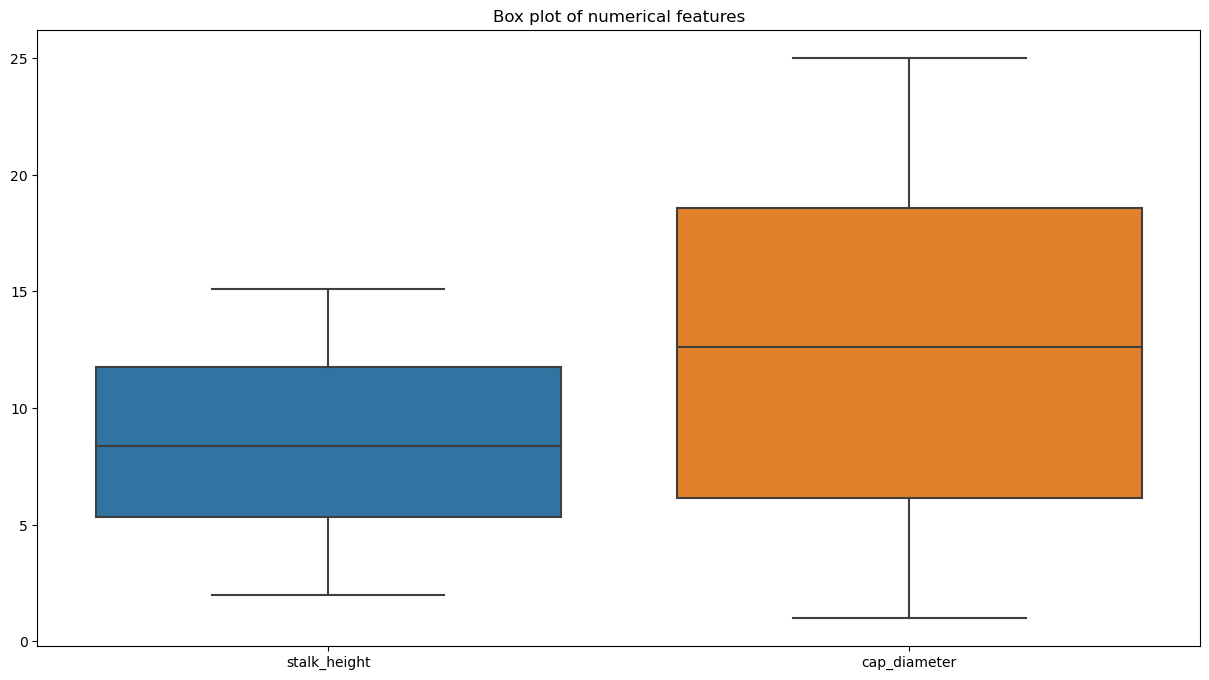

In [15]:
# Understanding feature distribution through various plots

# Box plot of numerical features
plt.figure(figsize=(15,8))
sns.boxplot(data=x, orient='v')
plt.title('Box plot of numerical features')
plt.show()

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


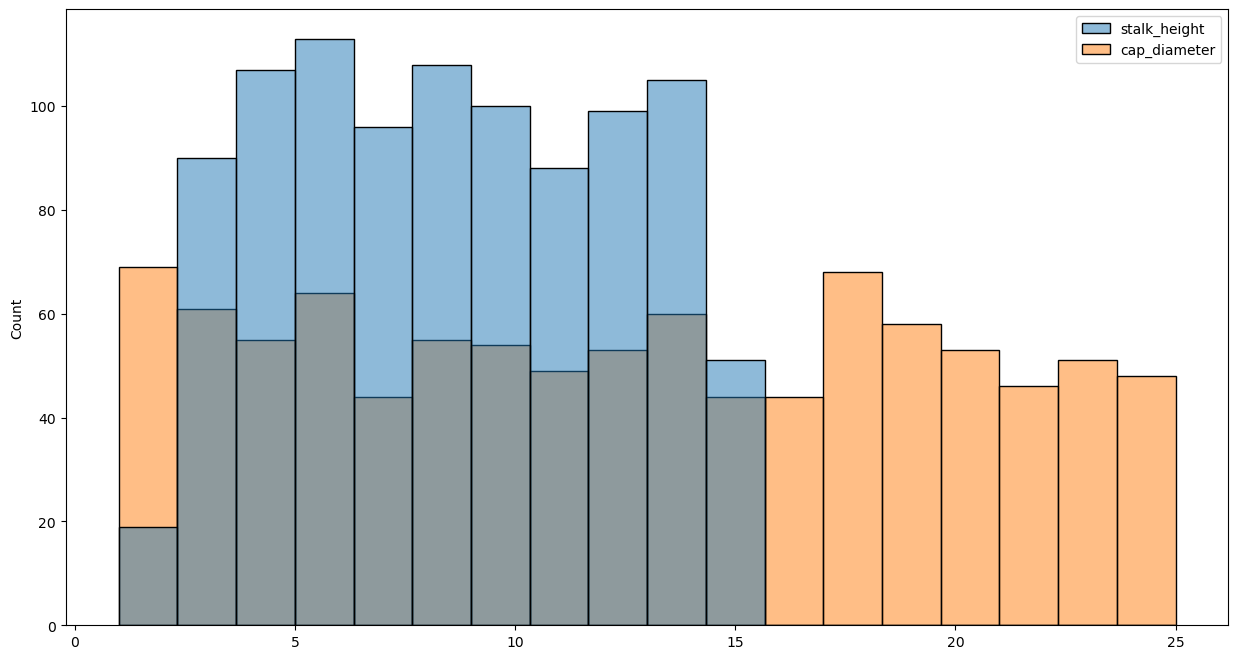

In [16]:
# Histogram plot
plt.figure(figsize=(15,8))
sns.histplot(x, kde=False)
plt.show()

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


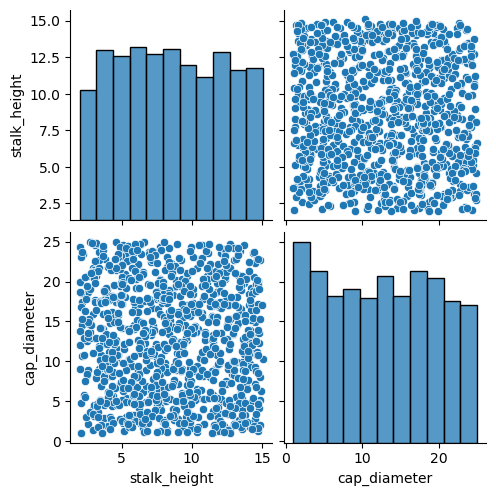

In [17]:
sns.pairplot(data)
plt.show()

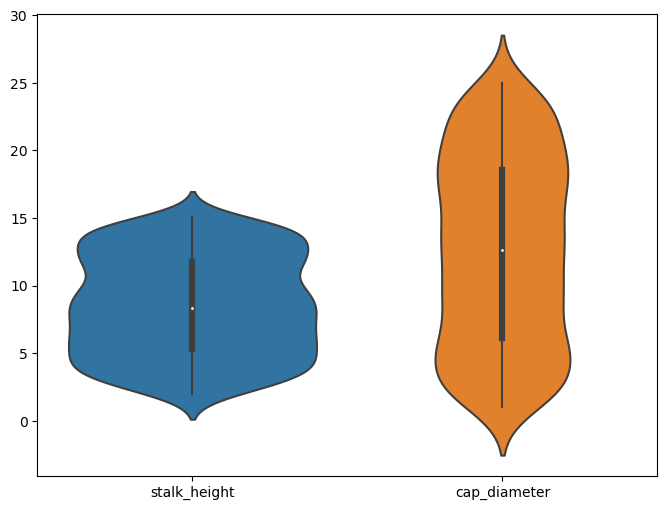

In [20]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=x)
plt.show()

In [51]:
# Split into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=365, stratify=y)

In [52]:
# Check results from stratification

y_train.value_counts(normalize=True)

class
poisonous    0.632504
edible       0.367496
Name: proportion, dtype: float64

In [53]:
pd.Series(y_test).value_counts(normalize=True)

class
poisonous    0.634812
edible       0.365188
Name: proportion, dtype: float64

In [54]:
# define a separate encoder for target inputs

enc_x = OrdinalEncoder()
enc_y = LabelEncoder()

In [55]:
# Apply the fit_transform() method on the training data and the transform() method on the test data

x_train_transf = enc_x.fit_transform(x_train)
#x_test_transf = enc_x.transform(x_test)

y_train_transf = enc_y.fit_transform(y_train)
y_test_transf = enc_y.transform(y_test)

In [56]:
# Combine the training and test data
x_combined = pd.concat([x_train, x_test])

# Fit the encoder on the combined data
enc_x.fit(x_combined)

# Transform both the training and test data
x_train_transf = enc_x.transform(x_train)
x_test_transf = enc_x.transform(x_test)

In [57]:
# In order for the SVC to work correctly the inputs need to be rescaled to the range (-1, 1)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

In [58]:
# Initiating classification

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(x_train_rescaled, y_train_transf)

In [59]:
enc_y.classes_

array(['edible', 'poisonous'], dtype=object)

In [60]:
# Evaluate model on test data

y_pred_test = svc.predict(scaling.transform(x_test_transf))

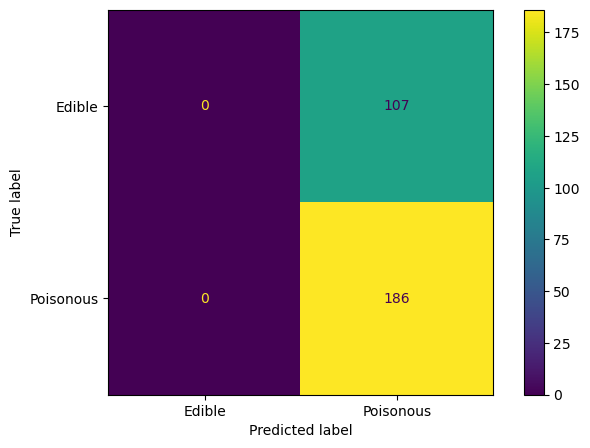

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf, y_pred_test),
    display_labels=["Edible", "Poisonous"],
)

cmp.plot(ax=ax);

In [62]:
print(classification_report(y_test_transf, y_pred_test, target_names = ["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       107
   Poisonous       0.63      1.00      0.78       186

    accuracy                           0.63       293
   macro avg       0.32      0.50      0.39       293
weighted avg       0.40      0.63      0.49       293



In [63]:
accuracy_score(y_test_transf, y_pred_test)

0.6348122866894198

In [64]:
# Hyperparameter tuning using GridSearchCV

tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["poly"], "C": [1, 10]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10]}
]

In [65]:
import warnings
warnings.filterwarnings("ignore")

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train_transf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'poly'}

Grid scores on development set:

0.316 (+/-0.003) for {'C': 1, 'kernel': 'linear'}
0.316 (+/-0.003) for {'C': 10, 'kernel': 'linear'}
0.448 (+/-0.144) for {'C': 1, 'kernel': 'poly'}
0.542 (+/-0.055) for {'C': 10, 'kernel': 'poly'}
0.316 (+/-0.003) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.316 (+/-0.003) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.316 (+/-0.003) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.316 (+/-0.003) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.37      0.34      0.35       107
           1       0.64      0.67      0.65       186

    accuracy                           0.55       293
   macro avg       0.50      0.50      0.

Support Vector Machines (SVMs) are powerful tools for classification tasks with various practical implications in real-world scenarios. Here are some key practical implications of SVMs in real-world classification tasks:

High-Dimensional Data: SVMs perform well in high-dimensional spaces, making them suitable for tasks with a large number of features, such as text classification, image recognition, and bioinformatics.

Non-Linear Decision Boundaries: SVMs can model complex, non-linear decision boundaries through the use of different kernel functions (e.g., polynomial, radial basis function), allowing them to handle non-linearly separable data.

Robustness to Overfitting: SVMs are less prone to overfitting compared to other models like decision trees, especially in high-dimensional spaces. They achieve this by maximizing the margin between classes.

Efficient Memory Usage: SVMs use a subset of training points (support vectors) to define the decision boundary, which reduces the memory requirements and makes them efficient for large datasets.

Balance between Bias and Variance: SVMs offer a good balance between bias and variance, making them suitable for tasks where finding the right balance is crucial, such as in medical diagnostics or financial forecasting.

Handling Imbalanced Datasets: SVMs can handle imbalanced datasets by adjusting class weights or using techniques like one-class SVMs for anomaly detection.

Interpretability: SVMs provide good interpretability, as the decision boundary is defined by a subset of the training data points (support vectors), making it easier to understand the model's decision-making process.

Versatility: SVMs can be applied to a wide range of classification tasks, including binary and multiclass classification, making them versatile for various real-world applications.

Scalability: SVMs can be scaled to large datasets using optimization techniques and parallel computing, making them suitable for real-time or big data applications.

Overall, SVMs are valuable tools in real-world classification tasks due to their ability to handle high-dimensional data, model non-linear decision boundaries, and provide a good balance between bias and variance. However, they may require careful selection of hyperparameters and kernel functions to achieve optimal performance.





